In [38]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [2]:
cd /content/drive/MyDrive/Talk_talk/target_df_label

/content/drive/.shortcut-targets-by-id/1Hc6JNdQGWtt7ZkVjQux9MMEg17i44ZOm/Talk_talk/target_df_label


In [10]:
csv_files = glob.glob('/content/drive/MyDrive/Talk_talk/target_df_label/*.csv')

df_list = []
for file in csv_files:
    df = pd.read_csv(file)
    df_list.append(df)

In [11]:
df = pd.concat(df_list, ignore_index=True)

In [14]:
df.head()

,unique_customer_identifier,calls_total_30d,calls_total_60d,calls_total_90d,calls_loyalty_30d,calls_loyalty_90d,calls_tech_30d,calls_tech_90d,calls_csb_30d,calls_csb_90d,calls_finance_30d,calls_finance_90d,days_since_last_call,call_type_diversity_90d,repeat_caller_flag_30d,talk_time_total_30d,talk_time_total_90d,hold_time_total_30d,hold_time_total_90d,avg_talk_time_per_call_90d,hold_ratio_90d,contract_dd_cancels,dd_cancel_60_day,any_contract_dd_cancel,any_dd_cancel_60d,ooc_days,contract_status,is_out_of_contract,is_near_ooc,tenure_bucket,usage_drop_pct_28d,sales_channel,technology,speed,line_speed,speed_gap,speed_gap_pct,is_churned
0,000bcca91cb6de20cc5191c4579f92f13430fb6f15d2b2...,0,0,0,0,0,0,0,0,0,0,0,91,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,-49,03 Soon to be OOC,0,1,24+ months,0.00,Online - Affiliate,MPF,18.0,0.000000,18.000000,1.000000,0
1,000c994611ccd522d116d190ee87a20d58407e97a3f253...,3,3,3,0,0,0,0,0,0,3,3,0,1,1,11.733333,11.733333,6.733333,6.733333,3.911111,0.573864,1,1,1,1,12,05 Newly OOC,1,0,24+ months,0.00,Online - Affiliate,FTTC,65.0,79.999000,-14.999000,-0.230754,1
2,0010cb2447ba4419727218ee906da636e6f6964df9e913...,0,0,0,0,0,0,0,0,0,0,0,91,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,604,06 OOC,1,0,24+ months,74.10,Migrated Customer,FTTC,65.0,79.649000,-14.649000,-0.225369,0
3,003b8fc177964842130249ca9a0008cd6063963543b411...,0,0,0,0,0,0,0,0,0,0,0,91,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,1,1,-77,03 Soon to be OOC,0,0,24+ months,0.00,Online - Affiliate,FTTC,65.0,0.000000,65.000000,1.000000,1
4,0044a141cffb1c522e8b41c774cd5420588d90b1bd5697...,0,1,2,0,0,0,0,0,2,0,0,36,1,0,0.000000,15.516667,0.000000,0.000000,7.758333,0.000000,0,0,0,0,-63,03 Soon to be OOC,0,0,24+ months,302.64,Partners,MPF,18.0,15.564536,2.435464,0.135304,1


In [16]:
df['is_churned'].value_counts()

,count
is_churned,
1,117559
0,85223


In [18]:
df.columns

Index(['unique_customer_identifier', 'calls_total_30d', 'calls_total_60d',
       'calls_total_90d', 'calls_loyalty_30d', 'calls_loyalty_90d',
       'calls_tech_30d', 'calls_tech_90d', 'calls_csb_30d', 'calls_csb_90d',
       'calls_finance_30d', 'calls_finance_90d', 'days_since_last_call',
       'call_type_diversity_90d', 'repeat_caller_flag_30d',
       'talk_time_total_30d', 'talk_time_total_90d', 'hold_time_total_30d',
       'hold_time_total_90d', 'avg_talk_time_per_call_90d', 'hold_ratio_90d',
       'contract_dd_cancels', 'dd_cancel_60_day', 'any_contract_dd_cancel',
       'any_dd_cancel_60d', 'ooc_days', 'contract_status',
       'is_out_of_contract', 'is_near_ooc', 'tenure_bucket',
       'usage_drop_pct_28d', 'sales_channel', 'technology', 'speed',
       'line_speed', 'speed_gap', 'speed_gap_pct', 'is_churned'],
      dtype='object')

In [20]:
cate_cols = ['contract_status','tenure_bucket','sales_channel','technology']
for col in cate_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

In [21]:
df.head()

,unique_customer_identifier,calls_total_30d,calls_total_60d,calls_total_90d,calls_loyalty_30d,calls_loyalty_90d,calls_tech_30d,calls_tech_90d,calls_csb_30d,calls_csb_90d,calls_finance_30d,calls_finance_90d,days_since_last_call,call_type_diversity_90d,repeat_caller_flag_30d,talk_time_total_30d,talk_time_total_90d,hold_time_total_30d,hold_time_total_90d,avg_talk_time_per_call_90d,hold_ratio_90d,contract_dd_cancels,dd_cancel_60_day,any_contract_dd_cancel,any_dd_cancel_60d,ooc_days,contract_status,is_out_of_contract,is_near_ooc,tenure_bucket,usage_drop_pct_28d,sales_channel,technology,speed,line_speed,speed_gap,speed_gap_pct,is_churned
0,000bcca91cb6de20cc5191c4579f92f13430fb6f15d2b2...,0,0,0,0,0,0,0,0,0,0,0,91,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,-49,2,0,1,4,0.00,3,3,18.0,0.000000,18.000000,1.000000,0
1,000c994611ccd522d116d190ee87a20d58407e97a3f253...,3,3,3,0,0,0,0,0,0,3,3,0,1,1,11.733333,11.733333,6.733333,6.733333,3.911111,0.573864,1,1,1,1,12,4,1,0,4,0.00,3,0,65.0,79.999000,-14.999000,-0.230754,1
2,0010cb2447ba4419727218ee906da636e6f6964df9e913...,0,0,0,0,0,0,0,0,0,0,0,91,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,604,5,1,0,4,74.10,2,0,65.0,79.649000,-14.649000,-0.225369,0
3,003b8fc177964842130249ca9a0008cd6063963543b411...,0,0,0,0,0,0,0,0,0,0,0,91,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,1,1,-77,2,0,0,4,0.00,3,0,65.0,0.000000,65.000000,1.000000,1
4,0044a141cffb1c522e8b41c774cd5420588d90b1bd5697...,0,1,2,0,0,0,0,0,2,0,0,36,1,0,0.000000,15.516667,0.000000,0.000000,7.758333,0.000000,0,0,0,0,-63,2,0,0,4,302.64,9,3,18.0,15.564536,2.435464,0.135304,1


In [26]:
X = df.drop(['unique_customer_identifier', 'is_churned'], axis=1)
y = df['is_churned']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [50]:
model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1]),  # Handle imbalance
    random_state=42,
    eval_metric='logloss'
)

In [51]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89     17045
           1       0.92      0.93      0.92     23512

    accuracy                           0.91     40557
   macro avg       0.91      0.91      0.91     40557
weighted avg       0.91      0.91      0.91     40557



In [53]:
cm = confusion_matrix(y_test, y_pred)

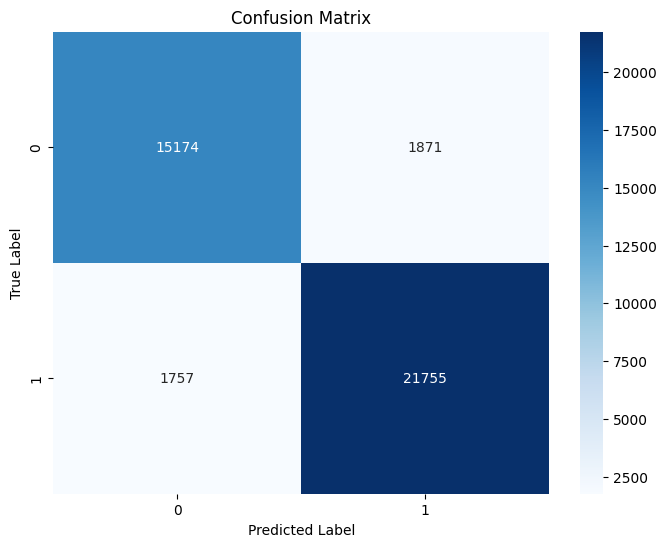

In [55]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

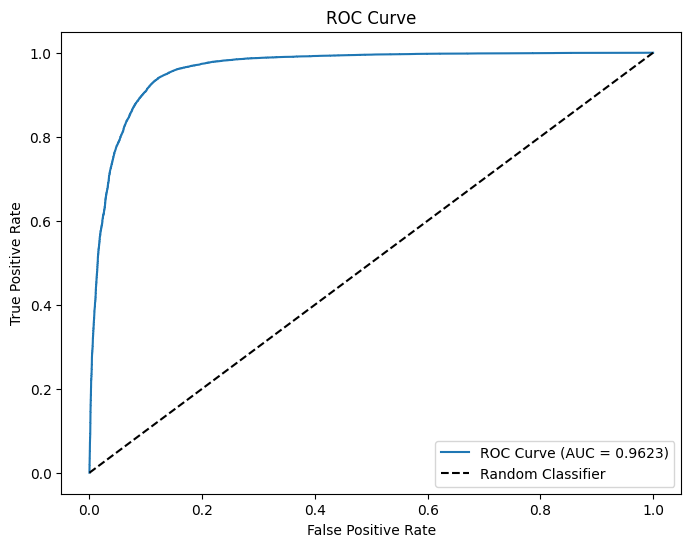

In [56]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [58]:
if isinstance(X_test, pd.DataFrame):
    # If X_test has user IDs as index or a column
    test_results = X_test.copy()
    test_results['actual_churn'] = y_test.values if isinstance(y_test, pd.Series) else y_test
    test_results['predicted_churn'] = y_pred
    test_results['churn_probability'] = y_pred_proba
    test_results['prediction_status'] = np.where(y_pred == y_test, 'Correct', 'Incorrect')
else:
    # If X_test is numpy array, create a DataFrame with generic indices
    test_results = pd.DataFrame(X_test)
    test_results['actual_churn'] = y_test
    test_results['predicted_churn'] = y_pred
    test_results['churn_probability'] = y_pred_proba
    test_results['prediction_status'] = np.where(y_pred == y_test, 'Correct', 'Incorrect')

# Select 10 random users
random_users = test_results.sample(n=10)

print("=" * 80)
print("RANDOM USER CHURN PROBABILITY ANALYSIS")
print("=" * 80)
print("\n10 Random Users with Churn Probability Scores:")
print(random_users[['churn_probability', 'predicted_churn', 'actual_churn', 'prediction_status']].to_string())

RANDOM USER CHURN PROBABILITY ANALYSIS

10 Random Users with Churn Probability Scores:
        churn_probability  predicted_churn  actual_churn prediction_status
149928           0.856365                1             1           Correct
92551            0.953020                1             1           Correct
93552            0.577668                1             0         Incorrect
196342           0.971787                1             1           Correct
63989            0.030146                0             0           Correct
81740            0.040950                0             0           Correct
62173            0.974285                1             1           Correct
132639           0.013507                0             0           Correct
121809           0.020056                0             0           Correct
108030           0.693453                1             1           Correct


In [39]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2]
}

In [40]:
base_model = XGBClassifier(
    scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1]),
    random_state=42,
    eval_metric='logloss'
)

In [42]:
grid_search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_grid,
    n_iter=50,
    scoring='roc_auc',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [43]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7, 9],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [46]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90     17045
           1       0.92      0.93      0.93     23512

    accuracy                           0.91     40557
   macro avg       0.91      0.91      0.91     40557
weighted avg       0.91      0.91      0.91     40557



In [35]:
model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',  # Handle imbalance
    random_state=42,
    solver='lbfgs'
)

In [36]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]


In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.84      0.73     17045
           1       0.85      0.66      0.74     23512

    accuracy                           0.74     40557
   macro avg       0.75      0.75      0.74     40557
weighted avg       0.77      0.74      0.74     40557



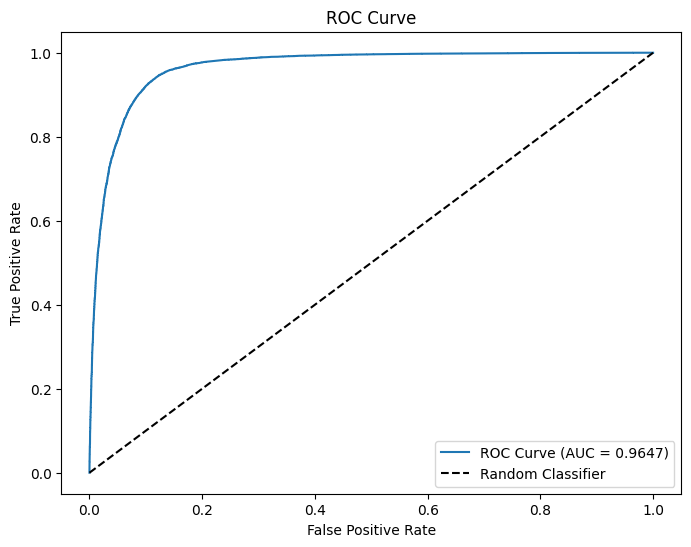

In [48]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()